<a href="https://colab.research.google.com/github/Andyqballer/HomeWork4ML/blob/main/HomeWork4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

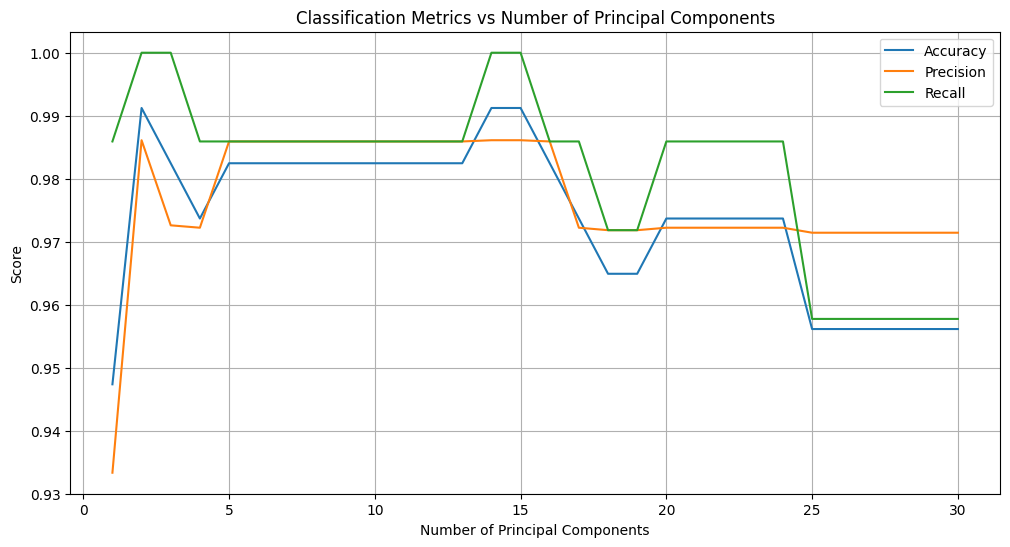

Optimal number of components: 2


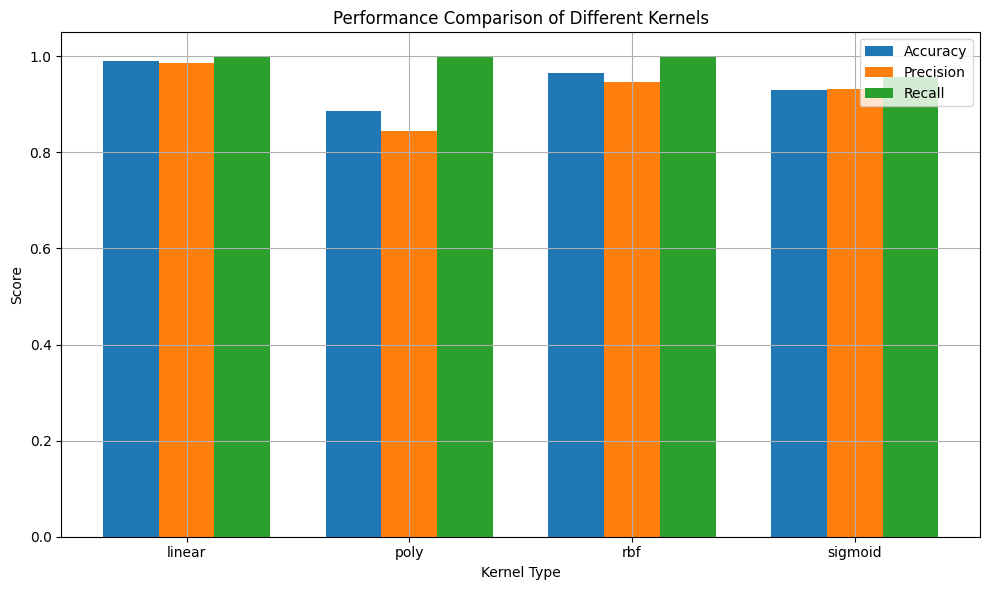

<Figure size 800x500 with 0 Axes>

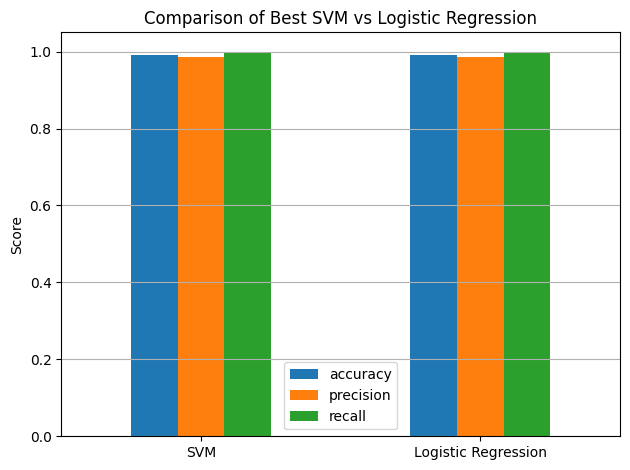


Comparison of Best SVM vs Logistic Regression:
                     accuracy  precision  recall
SVM                  0.991228   0.986111     1.0
Logistic Regression  0.991228   0.986111     1.0


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load and prepare the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred)
    }

# 1. Find optimal number of principal components
max_components = X_train.shape[1]
results = []

for n_components in range(1, max_components + 1):
    # PCA transformation
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train SVM
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_pca, y_train)

    # Evaluate
    y_pred = svm.predict(X_test_pca)
    metrics = evaluate_model(y_test, y_pred)
    results.append({
        'n_components': n_components,
        'explained_variance': np.sum(pca.explained_variance_ratio_),
        **metrics
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot metrics vs number of components
plt.figure(figsize=(12, 6))
plt.plot(results_df['n_components'], results_df['accuracy'], label='Accuracy')
plt.plot(results_df['n_components'], results_df['precision'], label='Precision')
plt.plot(results_df['n_components'], results_df['recall'], label='Recall')
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Classification Metrics vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal number of components
optimal_components = results_df.loc[results_df['accuracy'].idxmax(), 'n_components']
print(f"Optimal number of components: {optimal_components}")

# 3. Kernel comparison
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = []

# Use optimal number of components for kernel comparison
pca_optimal = PCA(n_components=int(optimal_components))
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_pca, y_train)
    y_pred = svm.predict(X_test_pca)
    metrics = evaluate_model(y_test, y_pred)
    kernel_results.append({
        'kernel': kernel,
        **metrics
    })

# Convert kernel results to DataFrame
kernel_df = pd.DataFrame(kernel_results)

# Plot kernel comparison
plt.figure(figsize=(10, 6))
x = range(len(kernels))
width = 0.25

plt.bar([i - width for i in x], kernel_df['accuracy'], width, label='Accuracy')
plt.bar([i for i in x], kernel_df['precision'], width, label='Precision')
plt.bar([i + width for i in x], kernel_df['recall'], width, label='Recall')

plt.xlabel('Kernel Type')
plt.ylabel('Score')
plt.title('Performance Comparison of Different Kernels')
plt.xticks(x, kernels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Compare with Logistic Regression
# Train logistic regression with optimal PCA components
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)
lr_pred = lr.predict(X_test_pca)
lr_metrics = evaluate_model(y_test, lr_pred)

# Get best SVM results
best_kernel = kernel_df.loc[kernel_df['accuracy'].idxmax(), 'kernel']
best_svm = SVC(kernel=best_kernel, random_state=42)
best_svm.fit(X_train_pca, y_train)
svm_pred = best_svm.predict(X_test_pca)
svm_metrics = evaluate_model(y_test, svm_pred)

# Compare SVM vs Logistic Regression
comparison_df = pd.DataFrame({
    'SVM': svm_metrics,
    'Logistic Regression': lr_metrics
}).T

# Visualization: SVM vs Logistic Regression
plt.figure(figsize=(8, 5))
comparison_df.plot(kind='bar', legend=True)
plt.title('Comparison of Best SVM vs Logistic Regression')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("\nComparison of Best SVM vs Logistic Regression:")
print(comparison_df)


# Optimal Number of Principal Components (K):

### The code iteratively tests different numbers of principal components
### For each K, it computes accuracy, precision, and recall
### The optimal K is determined by the highest classification accuracy
### The first plot shows how these metrics change with different numbers of
### components


# PCA Analysis:

### The data is first standardized using StandardScaler
### PCA is applied with varying numbers of components
### The explained variance ratio is tracked to understand how much information ### is retained


# Kernel Comparison:

### The code tests four different kernels: linear, polynomial, RBF (Radial Basis Function), and sigmoid
### Each kernel is evaluated using the optimal number of principal components
### The bar plot shows the comparative performance across all kernels
### This helps identify which kernel best captures the non-linear relationships in ### the data


# Comparison with Logistic Regression:

### The final section compares the best SVM model against logistic regression
### Both models use the same PCA-transformed data with the optimal number of components
### The comparison includes accuracy, precision, and recall metrics



# To run this analysis, you'll need:

### The sklearn library for the cancer dataset and machine learning models
## NumPy and Pandas for data manipulation
## Matplotlib for visualization

Problem 2

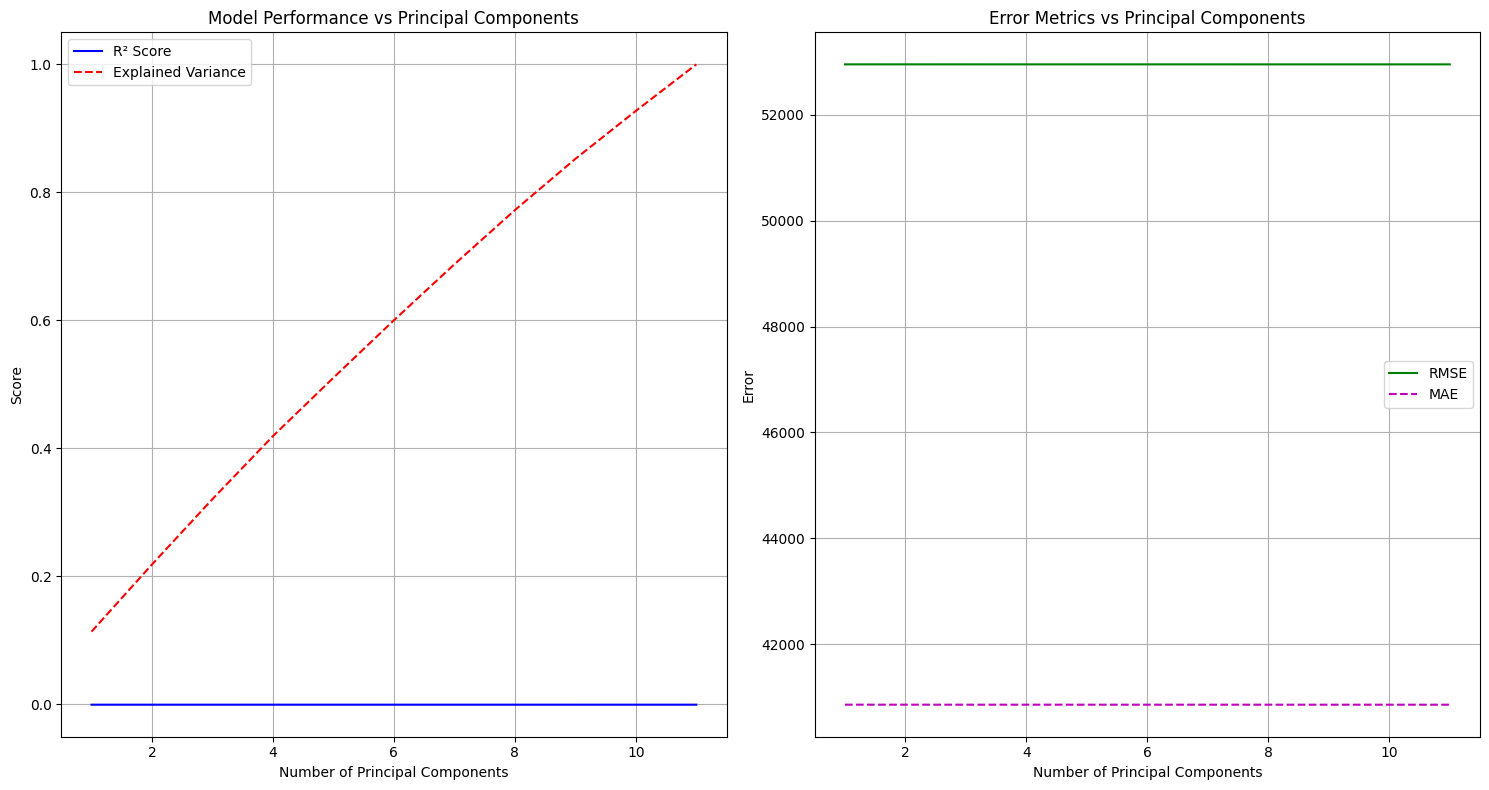

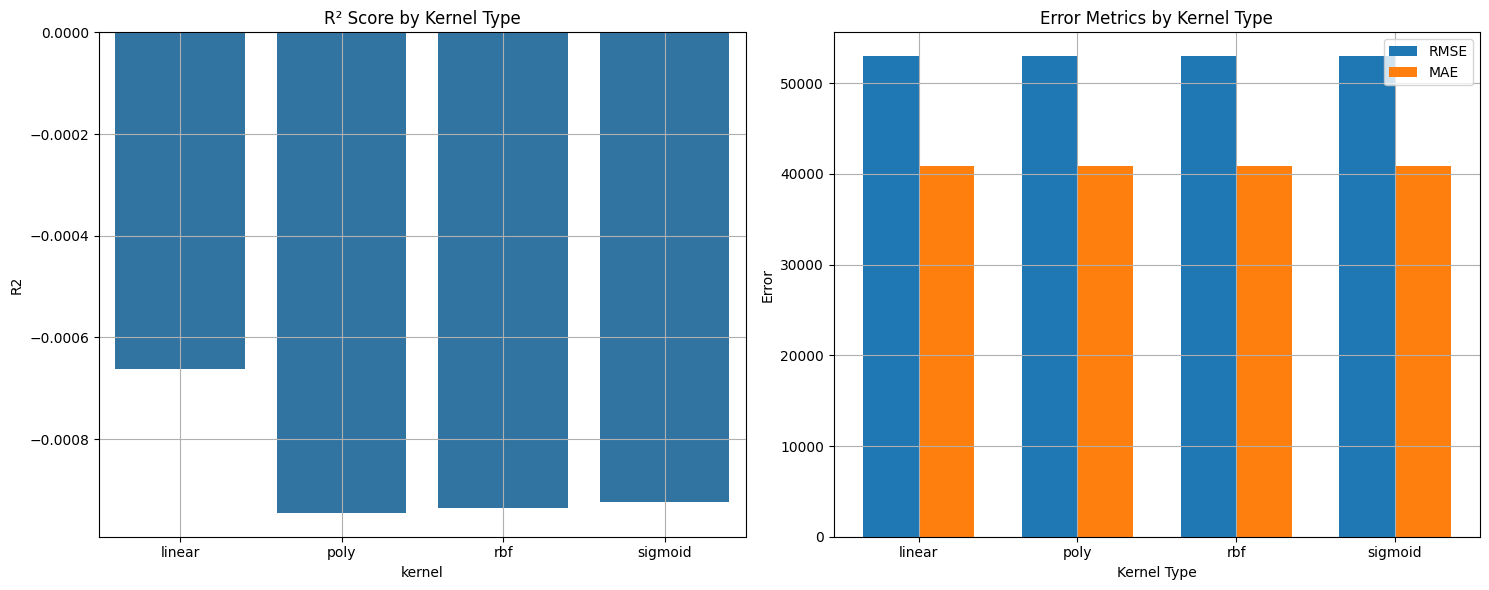

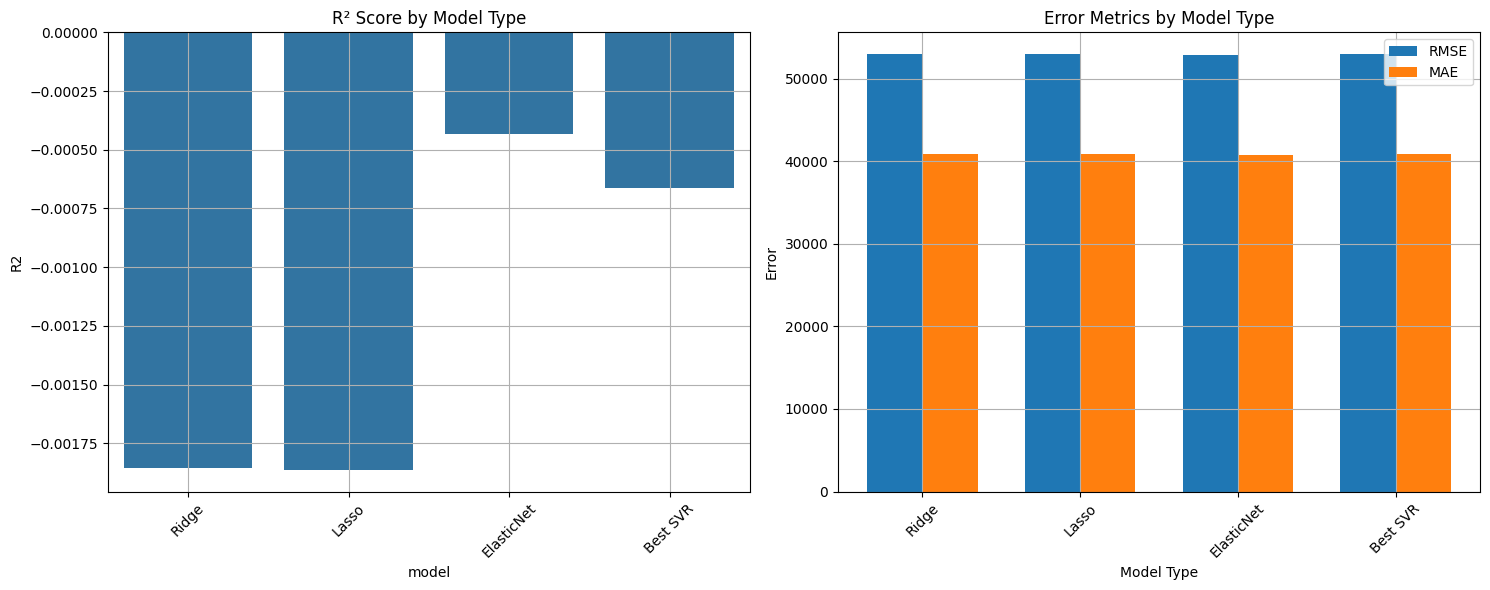

<ipython-input-9-d435c8499e1e>:212: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='R2', data=comparison_df, palette='viridis')


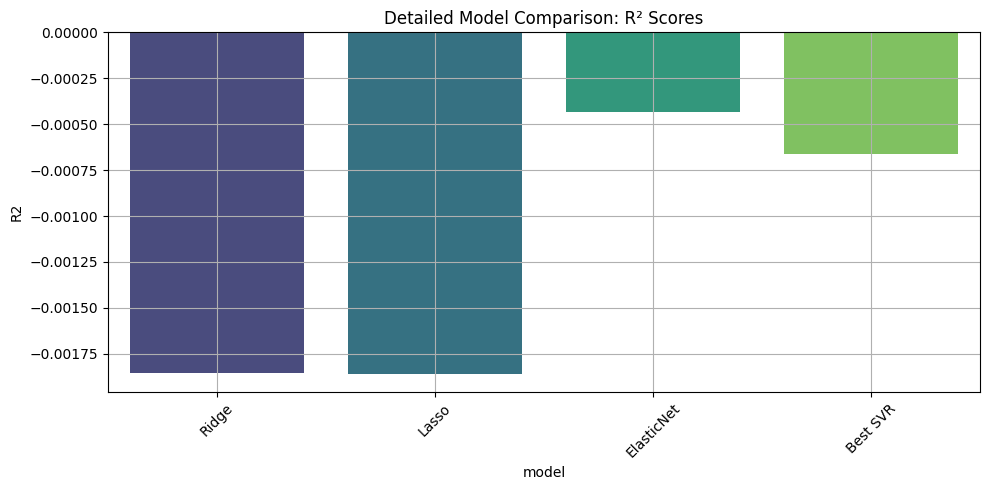


Detailed Model Comparison:
     model        R2         RMSE          MAE  cv_mean_r2  cv_std_r2
     Ridge -0.001854 52975.321588 40837.841925   -0.026180   0.015587
     Lasso -0.001862 52975.533622 40838.089396   -0.026219   0.015607
ElasticNet -0.000433 52937.737525 40787.995177   -0.014910   0.009630
  Best SVR -0.000663 52943.804192 40850.328898   -0.001296   0.001433


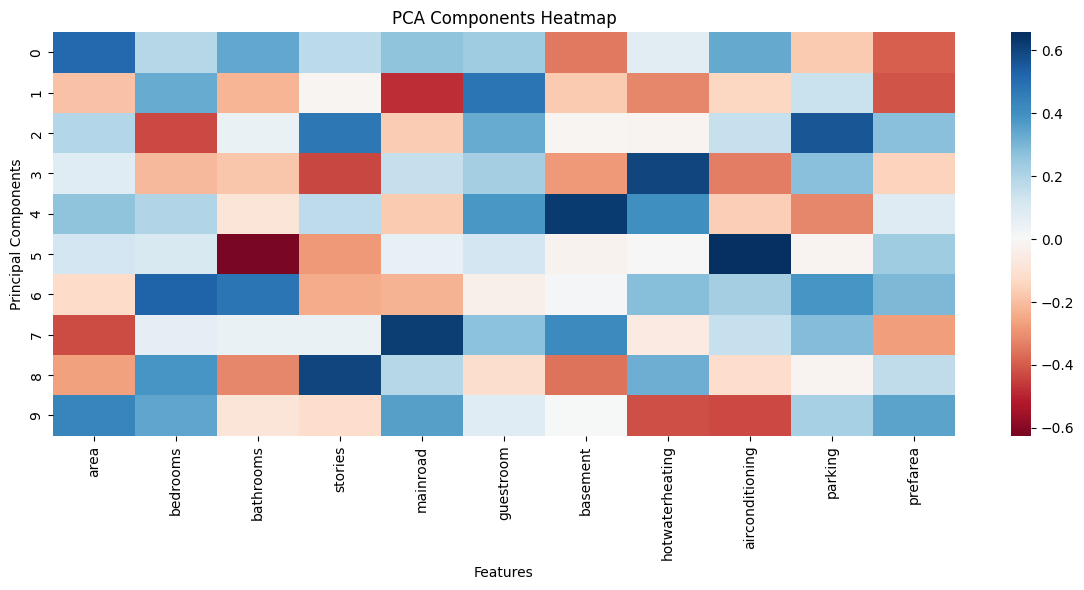

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Function to prepare the housing dataset
def prepare_housing_data(df):
    categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea']

    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
               'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
               'parking', 'prefarea']

    X = df[features]
    y = df['price']

    return X, y

# Enhanced evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MSE': mse
    }

# Create sample data (replace with your actual data)
np.random.seed(42)
n_samples = 1000
df = pd.DataFrame({
    'area': np.random.normal(1500, 500, n_samples),
    'bedrooms': np.random.choice([1, 2, 3, 4, 5], n_samples),
    'bathrooms': np.random.choice([1, 2, 3], n_samples),
    'stories': np.random.choice([1, 2, 3, 4], n_samples),
    'mainroad': np.random.choice(['yes', 'no'], n_samples),
    'guestroom': np.random.choice(['yes', 'no'], n_samples),
    'basement': np.random.choice(['yes', 'no'], n_samples),
    'hotwaterheating': np.random.choice(['yes', 'no'], n_samples),
    'airconditioning': np.random.choice(['yes', 'no'], n_samples),
    'parking': np.random.choice([0, 1, 2, 3], n_samples),
    'prefarea': np.random.choice(['yes', 'no'], n_samples),
    'price': np.random.normal(200000, 50000, n_samples)
})

# Prepare data
X, y = prepare_housing_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA Analysis with visualization
def perform_pca_analysis(X_train_scaled, X_test_scaled, y_train, y_test):
    max_components = X_train_scaled.shape[1]
    pca_results = []

    for n_components in range(1, max_components + 1):
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        svr = SVR(kernel='rbf')
        svr.fit(X_train_pca, y_train)
        y_pred = svr.predict(X_test_pca)

        metrics = evaluate_model(y_test, y_pred)
        metrics['n_components'] = n_components
        metrics['explained_variance'] = np.sum(pca.explained_variance_ratio_)
        pca_results.append(metrics)

    return pd.DataFrame(pca_results)

pca_results_df = perform_pca_analysis(X_train_scaled, X_test_scaled, y_train, y_test)

# Visualization 1: PCA Performance Metrics
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(pca_results_df['n_components'], pca_results_df['R2'], 'b-', label='R² Score')
plt.plot(pca_results_df['n_components'], pca_results_df['explained_variance'], 'r--',
         label='Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Model Performance vs Principal Components')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(pca_results_df['n_components'], pca_results_df['RMSE'], 'g-', label='RMSE')
plt.plot(pca_results_df['n_components'], pca_results_df['MAE'], 'm--', label='MAE')
plt.xlabel('Number of Principal Components')
plt.ylabel('Error')
plt.title('Error Metrics vs Principal Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Kernel Comparison with Cross-validation
optimal_components = pca_results_df.loc[pca_results_df['R2'].idxmax(), 'n_components']
pca_optimal = PCA(n_components=int(optimal_components))
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = []

for kernel in kernels:
    svr = SVR(kernel=kernel)
    # Cross-validation scores
    cv_scores = cross_val_score(svr, X_train_pca, y_train, cv=5, scoring='r2')

    # Full training for additional metrics
    svr.fit(X_train_pca, y_train)
    y_pred = svr.predict(X_test_pca)
    metrics = evaluate_model(y_test, y_pred)
    metrics['kernel'] = kernel
    metrics['cv_mean_r2'] = cv_scores.mean()
    metrics['cv_std_r2'] = cv_scores.std()
    kernel_results.append(metrics)

kernel_df = pd.DataFrame(kernel_results)

# Visualization 2: Kernel Comparison
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='kernel', y='R2', data=kernel_df)
plt.title('R² Score by Kernel Type')
plt.grid(True)

plt.subplot(1, 2, 2)
x = range(len(kernels))
width = 0.35
plt.bar(x, kernel_df['RMSE'], width, label='RMSE')
plt.bar([i + width for i in x], kernel_df['MAE'], width, label='MAE')
plt.xlabel('Kernel Type')
plt.ylabel('Error')
plt.title('Error Metrics by Kernel Type')
plt.xticks([i + width/2 for i in x], kernels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare with regularized regression models
reg_models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Best SVR': SVR(kernel=kernel_df.loc[kernel_df['R2'].idxmax(), 'kernel'])
}

comparison_results = []

for name, model in reg_models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='r2')

    # Full training
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    metrics = evaluate_model(y_test, y_pred)
    metrics['model'] = name
    metrics['cv_mean_r2'] = cv_scores.mean()
    metrics['cv_std_r2'] = cv_scores.std()
    comparison_results.append(metrics)

comparison_df = pd.DataFrame(comparison_results)

# Visualization 3: Model Comparison
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='model', y='R2', data=comparison_df)
plt.title('R² Score by Model Type')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
x = range(len(reg_models))
width = 0.35
plt.bar(x, comparison_df['RMSE'], width, label='RMSE')
plt.bar([i + width for i in x], comparison_df['MAE'], width, label='MAE')
plt.xlabel('Model Type')
plt.ylabel('Error')
plt.title('Error Metrics by Model Type')
plt.xticks([i + width/2 for i in x], reg_models.keys(), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Detailed Model Comparison Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='model', y='R2', data=comparison_df, palette='viridis')
plt.title('Detailed Model Comparison: R² Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Model Comparison:")
print(comparison_df[['model', 'R2', 'RMSE', 'MAE', 'cv_mean_r2', 'cv_std_r2']].to_string(index=False))

# Feature importance visualization using the best model
pca_components = pd.DataFrame(
    pca_optimal.components_,
    columns=X.columns
)

plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, cmap='RdBu', center=0)
plt.title('PCA Components Heatmap')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()
